In [17]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
data = pd.read_csv('E:\Research\Structural Heart Disease\dataset\EchoNext_metadata_100k.csv')
data

,ecg_key,patient_key,age_at_ecg,sex,acquisition_year,ventricular_rate,atrial_rate,pr_interval,qrs_duration,qt_corrected,...,tricuspid_regurgitation_value,pulmonary_regurgitation_value,rv_systolic_function_value,pericardial_effusion_value,ivs_measurement,lvpw_measurement,pasp_value,tr_max_velocity_value,lvef_value,split
0,8520052,902618160,88,male,2014,117.0,117.0,162.0,116.0,463.0,...,none,presumed none,normal,trace,1.0,1.0,NaN,NaN,62.5,train
1,7283576,4764241080,69,female,2019,99.0,99.0,128.0,74.0,449.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
2,8769869,4214459612,22,male,2017,86.0,86.0,144.0,84.0,485.0,...,none,none,mildly_reduced,small,1.1,1.1,51.0,NaN,57.5,train
3,6379904,6205191619,70,male,2022,68.0,68.0,136.0,80.0,427.0,...,none,none,normal,none,0.9,1.0,NaN,NaN,45.0,train
4,9619545,8380688329,54,male,2013,90.0,93.0,NaN,188.0,582.0,...,mild,none,moderately_reduced,small,1.2,1.0,38.0,2.6,20.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11224461,3435945264,62,male,2022,81.0,81.0,320.0,98.0,443.0,...,mild,none,normal,trace,1.2,1.1,43.0,2.7,62.5,no_split
99996,11226230,6249738043,36,female,2022,98.0,98.0,116.0,78.0,428.0,...,mild,none,normal,small,1.1,1.2,NaN,1.8,57.5,no_split
99997,11226538,2859644849,69,male,2022,84.0,84.0,136.0,86.0,437.0,...,none,none,normal,moderate,0.9,1.3,NaN,NaN,60.0,no_split
99998,11226778,5302291537,46,female,2022,111.0,111.0,128.0,70.0,437.0,...,none,presumed none,normal,moderate,1.0,1.0,NaN,NaN,57.5,no_split


In [19]:
# Sample 35% of the data randomly
data = data.sample(frac=0.35, random_state=42)

# Display the shape of the sampled data
print("Shape of the sampled data:", data.shape)

# Display the first few rows of the sampled data
display(data.head())

Shape of the sampled data: (35000, 35)


,ecg_key,patient_key,age_at_ecg,sex,acquisition_year,ventricular_rate,atrial_rate,pr_interval,qrs_duration,qt_corrected,...,tricuspid_regurgitation_value,pulmonary_regurgitation_value,rv_systolic_function_value,pericardial_effusion_value,ivs_measurement,lvpw_measurement,pasp_value,tr_max_velocity_value,lvef_value,split
75721,7403084,981617986,66,male,2011,82.0,82.0,156.0,98.0,464.0,...,none,mild,normal,small,1.4,1.4,NaN,NaN,42.5,val
80184,10069745,3509735447,70,male,2012,62.0,62.0,168.0,90.0,436.0,...,none,none,normal,trace,1.2,1.2,30.0,2.3,52.5,test
19864,10865900,4799489351,87,male,2019,74.0,375.0,NaN,102.0,426.0,...,mild,none,normal,none,0.9,0.9,62.5,3.7,62.5,train
76699,8958905,1808045426,79,female,2018,105.0,105.0,148.0,90.0,467.0,...,none,mild,normal,small,NaN,1.2,35.0,2.8,57.5,val
92991,9314742,1538890220,60,female,2017,111.0,111.0,190.0,144.0,481.0,...,none,presumed none,normal,none,1.2,1.1,NaN,NaN,60.0,no_split


In [20]:
data.shape

(35000, 35)

In [21]:
data.isnull().sum()

ecg_key                                                 0
patient_key                                             0
age_at_ecg                                              0
sex                                                     0
acquisition_year                                        0
ventricular_rate                                        0
atrial_rate                                           201
pr_interval                                          3709
qrs_duration                                            0
qt_corrected                                            1
lvef_lte_45_flag                                        0
lvwt_gte_13_flag                                        0
aortic_stenosis_moderate_or_greater_flag                0
aortic_regurgitation_moderate_or_greater_flag           0
mitral_regurgitation_moderate_or_greater_flag           0
tricuspid_regurgitation_moderate_or_greater_flag        0
pulmonary_regurgitation_moderate_or_greater_flag        0
rv_systolic_dy

In [22]:
data['atrial_rate'] = data['atrial_rate'].fillna(data['atrial_rate'].mean())
data['pr_interval'] = data['pr_interval'].fillna(data['pr_interval'].mean())
data['aortic_stenosis_value'] = data['aortic_stenosis_value'].fillna(data['aortic_stenosis_value'].mode()[0])
data['aortic_regurgitation_value'] = data['aortic_regurgitation_value'].fillna(data['aortic_regurgitation_value'].mode()[0])
data['mitral_regurgitation_value'] = data['mitral_regurgitation_value'].fillna(data['mitral_regurgitation_value'].mode()[0])
data['tricuspid_regurgitation_value'] = data['tricuspid_regurgitation_value'].fillna(data['tricuspid_regurgitation_value'].mode()[0])
data['pulmonary_regurgitation_value'] = data['pulmonary_regurgitation_value'].fillna(data['pulmonary_regurgitation_value'].mode()[0])
data['rv_systolic_function_value'] = data['rv_systolic_function_value'].fillna(data['rv_systolic_function_value'].mode()[0])
data['pericardial_effusion_value'] = data['pericardial_effusion_value'].fillna(data['pericardial_effusion_value'].mode()[0])
data['ivs_measurement'] = data['ivs_measurement'].fillna(data['ivs_measurement'].mean())
data['lvpw_measurement'] = data['lvpw_measurement'].fillna(data['lvpw_measurement'].mean())
data['pasp_value'] = data['pasp_value'].fillna(data['pasp_value'].mean())
data['tr_max_velocity_value'] = data['tr_max_velocity_value'].fillna(data['tr_max_velocity_value'].mean())
data['lvef_value'] = data['lvef_value'].fillna(data['lvef_value'].mean())
data['qt_corrected'] = data['qt_corrected'].fillna(data['qt_corrected'].mean())

In [23]:
data.isnull().sum()

ecg_key                                             0
patient_key                                         0
age_at_ecg                                          0
sex                                                 0
acquisition_year                                    0
ventricular_rate                                    0
atrial_rate                                         0
pr_interval                                         0
qrs_duration                                        0
qt_corrected                                        0
lvef_lte_45_flag                                    0
lvwt_gte_13_flag                                    0
aortic_stenosis_moderate_or_greater_flag            0
aortic_regurgitation_moderate_or_greater_flag       0
mitral_regurgitation_moderate_or_greater_flag       0
tricuspid_regurgitation_moderate_or_greater_flag    0
pulmonary_regurgitation_moderate_or_greater_flag    0
rv_systolic_dysfunction_moderate_or_greater_flag    0
pericardial_effusion_moderat

In [24]:
from sklearn.preprocessing import LabelEncoder

categorical_features = [
    'aortic_stenosis_value',
    'aortic_regurgitation_value',
    'mitral_regurgitation_value',
    'tricuspid_regurgitation_value',
    'pulmonary_regurgitation_value',
    'rv_systolic_function_value',
    'pericardial_effusion_value',
    'sex'
]

le = LabelEncoder()
for col in categorical_features:
    data[col] = le.fit_transform(data[col])

In [25]:
data

,ecg_key,patient_key,age_at_ecg,sex,acquisition_year,ventricular_rate,atrial_rate,pr_interval,qrs_duration,qt_corrected,...,tricuspid_regurgitation_value,pulmonary_regurgitation_value,rv_systolic_function_value,pericardial_effusion_value,ivs_measurement,lvpw_measurement,pasp_value,tr_max_velocity_value,lvef_value,split
75721,7403084,981617986,66,1,2011,82.0,82.0,156.000000,98.0,464.0,...,2,0,2,3,1.40000,1.400000,41.621129,2.753831,42.500000,val
80184,10069745,3509735447,70,1,2012,62.0,62.0,168.000000,90.0,436.0,...,2,2,2,4,1.20000,1.200000,30.000000,2.300000,52.500000,test
19864,10865900,4799489351,87,1,2019,74.0,375.0,159.543639,102.0,426.0,...,0,2,2,2,0.90000,0.900000,62.500000,3.700000,62.500000,train
76699,8958905,1808045426,79,0,2018,105.0,105.0,148.000000,90.0,467.0,...,2,0,2,3,1.11538,1.200000,35.000000,2.800000,57.500000,val
92991,9314742,1538890220,60,0,2017,111.0,111.0,190.000000,144.0,481.0,...,2,3,2,2,1.20000,1.100000,41.621129,2.753831,60.000000,no_split
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42177,8493873,6491728324,69,1,2016,69.0,69.0,188.000000,112.0,477.0,...,2,3,2,4,1.10000,1.100000,41.621129,2.753831,57.500000,train
98166,10702542,5435487629,62,1,2012,85.0,88.0,159.543639,90.0,490.0,...,1,0,0,4,1.90000,1.700000,41.621129,3.600000,32.500000,no_split
40881,8795941,4070239680,63,1,2020,85.0,85.0,168.000000,88.0,490.0,...,2,2,2,2,1.40000,1.300000,31.000000,2.400000,62.500000,train
45144,7347380,6449813676,55,0,2022,142.0,142.0,132.000000,76.0,406.0,...,2,2,0,4,1.10000,1.100000,44.000000,2.753831,45.000000,train


In [26]:
data = data.drop(columns=['ecg_key', 'patient_key', 'split'], axis=1)

In [27]:
data.shape

(35000, 32)

In [28]:
data

,age_at_ecg,sex,acquisition_year,ventricular_rate,atrial_rate,pr_interval,qrs_duration,qt_corrected,lvef_lte_45_flag,lvwt_gte_13_flag,...,mitral_regurgitation_value,tricuspid_regurgitation_value,pulmonary_regurgitation_value,rv_systolic_function_value,pericardial_effusion_value,ivs_measurement,lvpw_measurement,pasp_value,tr_max_velocity_value,lvef_value
75721,66,1,2011,82.0,82.0,156.000000,98.0,464.0,1,1,...,2,2,0,2,3,1.40000,1.400000,41.621129,2.753831,42.500000
80184,70,1,2012,62.0,62.0,168.000000,90.0,436.0,0,0,...,0,2,2,2,4,1.20000,1.200000,30.000000,2.300000,52.500000
19864,87,1,2019,74.0,375.0,159.543639,102.0,426.0,0,0,...,4,0,2,2,2,0.90000,0.900000,62.500000,3.700000,62.500000
76699,79,0,2018,105.0,105.0,148.000000,90.0,467.0,0,0,...,2,2,0,2,3,1.11538,1.200000,35.000000,2.800000,57.500000
92991,60,0,2017,111.0,111.0,190.000000,144.0,481.0,0,0,...,2,2,3,2,2,1.20000,1.100000,41.621129,2.753831,60.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42177,69,1,2016,69.0,69.0,188.000000,112.0,477.0,0,0,...,2,2,3,2,4,1.10000,1.100000,41.621129,2.753831,57.500000
98166,62,1,2012,85.0,88.0,159.543639,90.0,490.0,1,1,...,0,1,0,0,4,1.90000,1.700000,41.621129,3.600000,32.500000
40881,63,1,2020,85.0,85.0,168.000000,88.0,490.0,0,1,...,2,2,2,2,2,1.40000,1.300000,31.000000,2.400000,62.500000
45144,55,0,2022,142.0,142.0,132.000000,76.0,406.0,1,0,...,0,2,2,0,4,1.10000,1.100000,44.000000,2.753831,45.000000


In [29]:
# Select features and target
features = [
    'age_at_ecg', 'sex', 'acquisition_year', 'ventricular_rate', 'atrial_rate', 'pr_interval', 'qrs_duration', 'qt_corrected', 'lvef_lte_45_flag', 'lvwt_gte_13_flag', 'aortic_stenosis_moderate_or_greater_flag', 'aortic_regurgitation_moderate_or_greater_flag', 'mitral_regurgitation_moderate_or_greater_flag', 'tricuspid_regurgitation_moderate_or_greater_flag', 'pulmonary_regurgitation_moderate_or_greater_flag', 'rv_systolic_dysfunction_moderate_or_greater_flag', 'pericardial_effusion_moderate_large_flag', 'pasp_gte_45_flag', 'tr_max_gte_32_flag', 'aortic_stenosis_value', 'aortic_regurgitation_value', 'mitral_regurgitation_value', 'tricuspid_regurgitation_value', 'pulmonary_regurgitation_value', 'rv_systolic_function_value', 'pericardial_effusion_value', 'ivs_measurement', 'lvpw_measurement', 'pasp_value', 'tr_max_velocity_value', 'lvef_value'
]

X = data[features]
y = data['shd_moderate_or_greater_flag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Show top 10 features
top_features = feat_imp.head(10)
print("Top 10 most important features:")
print(top_features)

# Use only top 10 features for modeling
X_top_train = X_train[top_features.index]
X_top_test = X_test[top_features.index]

# You can now scale and train models using X_top_train and X_top_test

# Scaling
scaler = StandardScaler()
X_top_train_scaled = scaler.fit_transform(X_top_train)
X_top_test_scaled = scaler.transform(X_top_test)

Top 10 most important features:
lvwt_gte_13_flag                                    0.137825
lvef_lte_45_flag                                    0.128875
lvef_value                                          0.125619
ivs_measurement                                     0.115078
pasp_value                                          0.080642
pasp_gte_45_flag                                    0.061202
lvpw_measurement                                    0.057812
tricuspid_regurgitation_moderate_or_greater_flag    0.040151
rv_systolic_dysfunction_moderate_or_greater_flag    0.038998
mitral_regurgitation_value                          0.028009
dtype: float64


In [30]:
print(f'Training set size: {X_train.shape}, Test set size: {X_test.shape}')
print(f'Positive class in training set: {y_train.sum()}, Positive class in test set: {y_test.sum()}')
print(f'Negative class in training set: {len(y_train) - y_train.sum()}, Negative class in test set: {len(y_test) - y_test.sum()}')
print(f'Positive class ratio in training set: {y_train.mean():.4f}, Positive class ratio in test set: {y_test.mean():.4f}')
print(f'Negative class ratio in training set: {1 - y_train.mean():.4f}, Negative class ratio in test set: {1 - y_test.mean():.4f}')

Training set size: (28000, 31), Test set size: (7000, 31)
Positive class in training set: 14627, Positive class in test set: 3657
Negative class in training set: 13373, Negative class in test set: 3343
Positive class ratio in training set: 0.5224, Positive class ratio in test set: 0.5224
Negative class ratio in training set: 0.4776, Negative class ratio in test set: 0.4776


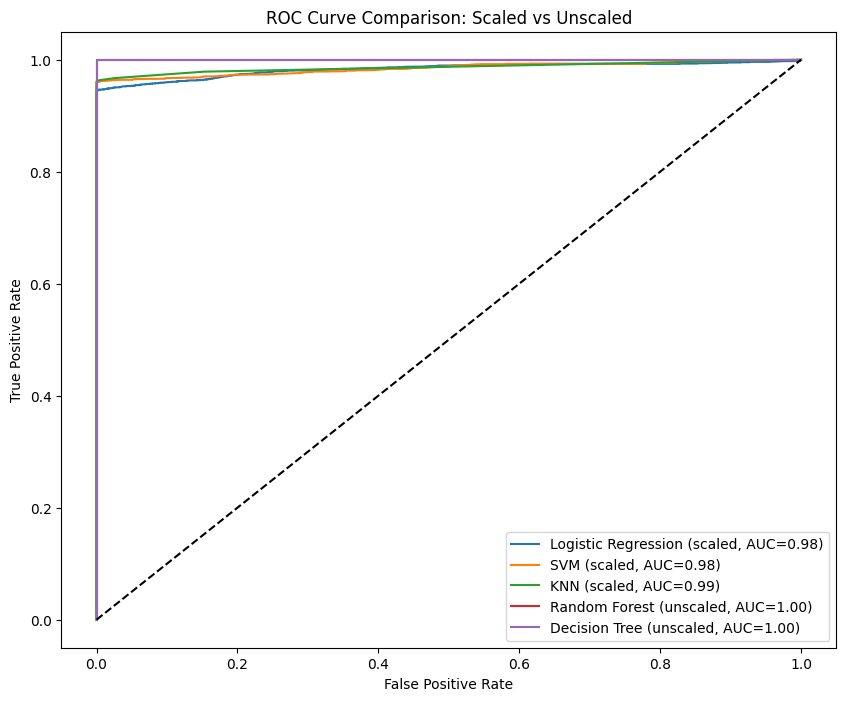

In [31]:
# Define models
models_scaled = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

models_unscaled = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

plt.figure(figsize=(10,8))

# Scaled models
for name, model in models_scaled.items():
    model.fit(X_top_train_scaled, y_train)
    y_pred_prob = model.predict_proba(X_top_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (scaled, AUC={roc_auc:.2f})')

# Unscaled models
for name, model in models_unscaled.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (unscaled, AUC={roc_auc:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Scaled vs Unscaled')
plt.legend(loc='lower right')
plt.show()

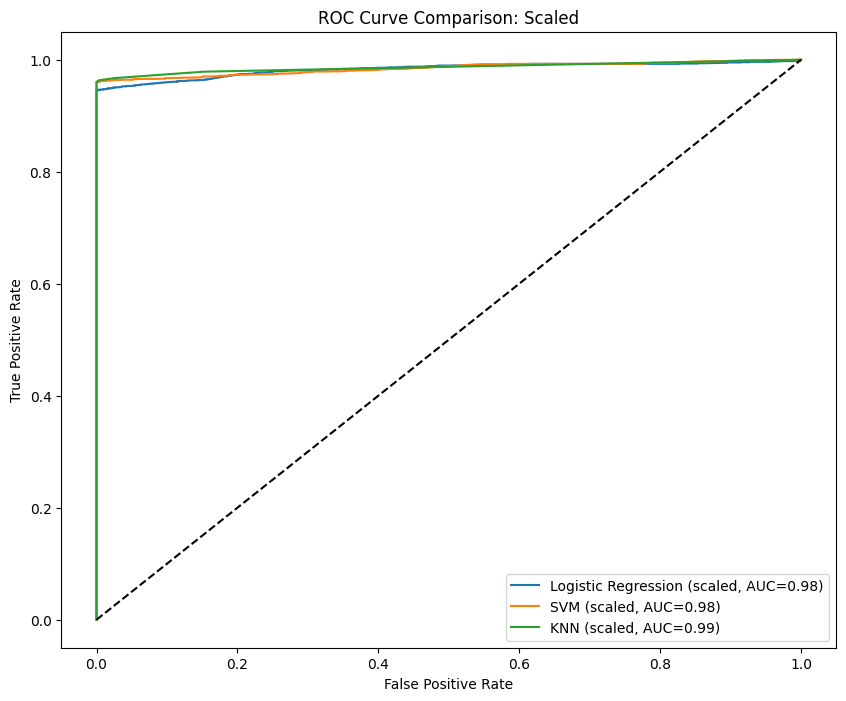

In [32]:
# Define models
models_scaled = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

# models_unscaled = {
#     'Random Forest': RandomForestClassifier(),
#     'Decision Tree': DecisionTreeClassifier()
# }

plt.figure(figsize=(10,8))

# Scaled models
for name, model in models_scaled.items():
    model.fit(X_top_train_scaled, y_train)
    y_pred_prob = model.predict_proba(X_top_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (scaled, AUC={roc_auc:.2f})')

# # Unscaled models
# for name, model in models_unscaled.items():
#     model.fit(X_train, y_train)
#     y_pred_prob = model.predict_proba(X_test)[:, 1]
#     fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'{name} (unscaled, AUC={roc_auc:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Scaled')
plt.legend(loc='lower right')
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
# 1. Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_top_train_scaled, y_train)
print("Logistic Regression score:", logreg.score(X_top_test_scaled, y_test))

# Fine-tuning Logistic Regression
param_grid_lr = {
    'C': np.logspace(-3, 2, 10),  # C from 0.001 to 100, 10 values
    'penalty': ['l1', 'l2', 'elasticnet', 'none', 'l2c'],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs']  # solvers that support l1 and l2
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='roc_auc')
grid_lr.fit(X_top_train_scaled, y_train)
print("Best Logistic Regression params:", grid_lr.best_params_)
print("Best Logistic Regression ROC AUC:", grid_lr.score(X_top_test_scaled, y_test))
#!/usr/bin/env python3

Logistic Regression score: 0.9711428571428572


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
700 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\P

Best Logistic Regression params: {'C': np.float64(0.1668100537200059), 'penalty': 'l1', 'solver': 'saga'}
Best Logistic Regression ROC AUC: 0.9835118844440539


In [35]:
# 2. SVM - Optimized for speed
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, reciprocal

svm = SVC(probability=True)
svm.fit(X_top_train_scaled, y_train)
print("SVM score:", svm.score(X_top_test_scaled, y_test))

# Optimized SVM fine-tuning using RandomizedSearchCV
param_dist_svm = {
    'C': reciprocal(0.001, 100),  # Continuous distribution for C
    'kernel': ['linear', 'rbf'],  # Only most effective kernels
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 1, 5))  # Reduced gamma options
}

# Use RandomizedSearchCV with fewer iterations for speed
random_svm = RandomizedSearchCV(
    SVC(probability=True), 
    param_dist_svm, 
    n_iter=20,  # Much fewer iterations than full grid search
    cv=3,  # Reduced CV folds for speed
    scoring='roc_auc',
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=1
)

print("Starting optimized SVM tuning...")
random_svm.fit(X_top_train_scaled, y_train)
print("Best SVM params:", random_svm.best_params_)
print("Best SVM ROC AUC:", random_svm.score(X_top_test_scaled, y_test))

SVM score: 0.979
Starting optimized SVM tuning...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best SVM params: {'C': np.float64(0.4206039057901998), 'gamma': np.float64(10.0), 'kernel': 'rbf'}
Best SVM ROC AUC: 0.986998900890453


In [36]:
# 3. KNN
knn = KNeighborsClassifier()
knn.fit(X_top_train_scaled, y_train)
print("KNN score:", knn.score(X_top_test_scaled, y_test))

# Fine-tuning KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_knn.fit(X_top_train_scaled, y_train)
print("Best KNN params:", grid_knn.best_params_)
print("Best KNN ROC AUC:", grid_knn.score(X_top_test_scaled, y_test))

KNN score: 0.9791428571428571
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best KNN params: {'n_neighbors': 11, 'weights': 'uniform'}
Best KNN ROC AUC: 0.9874874758197125


In [37]:
import joblib
# Save the best models
joblib.dump(grid_lr.best_estimator_, 'best_logistic_regression_model.pkl')
joblib.dump(random_svm.best_estimator_, 'best_svm_model.pkl')  # Updated to use optimized SVM
joblib.dump(grid_knn.best_estimator_, 'best_knn_model.pkl')
#!/usr/bin/env python3

['best_knn_model.pkl']

EXPLORATORY DATA ANALYSIS FOR STRUCTURAL HEART DISEASE


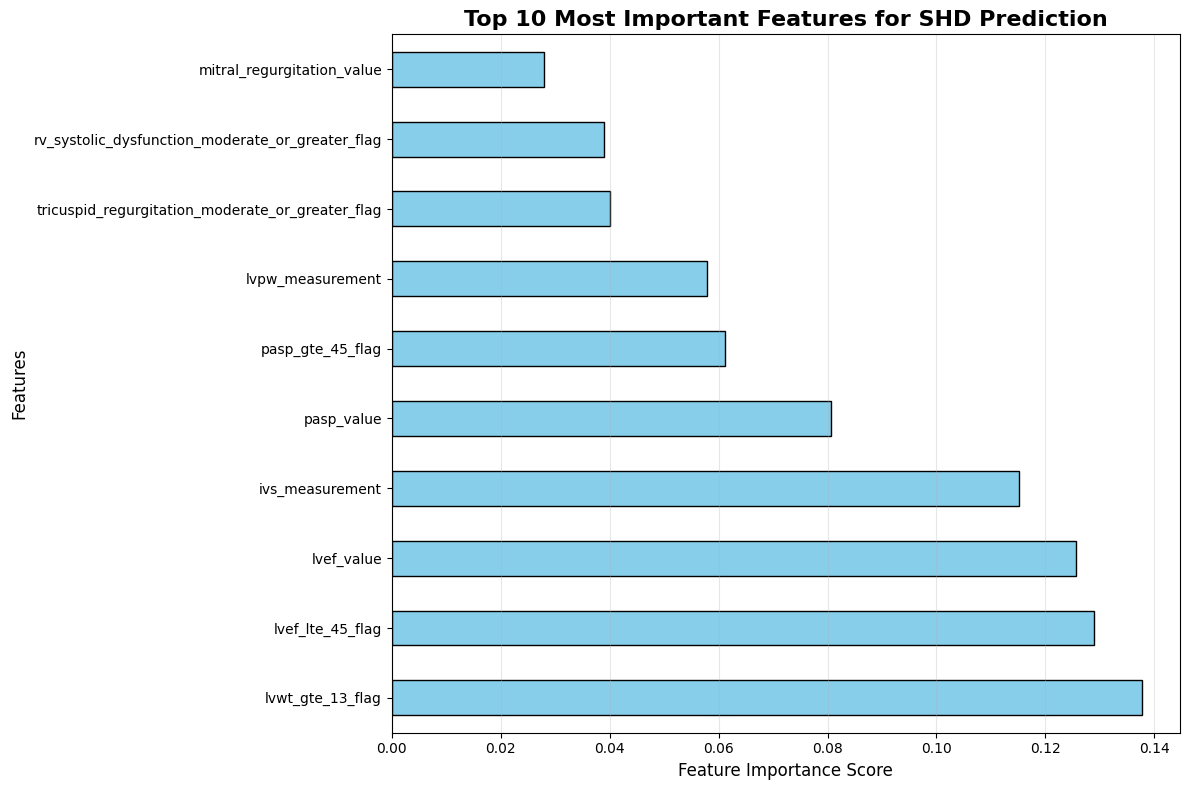


Top 5 Most Important Features:
1. lvwt_gte_13_flag: 0.1378
2. lvef_lte_45_flag: 0.1289
3. lvef_value: 0.1256
4. ivs_measurement: 0.1151
5. pasp_value: 0.0806


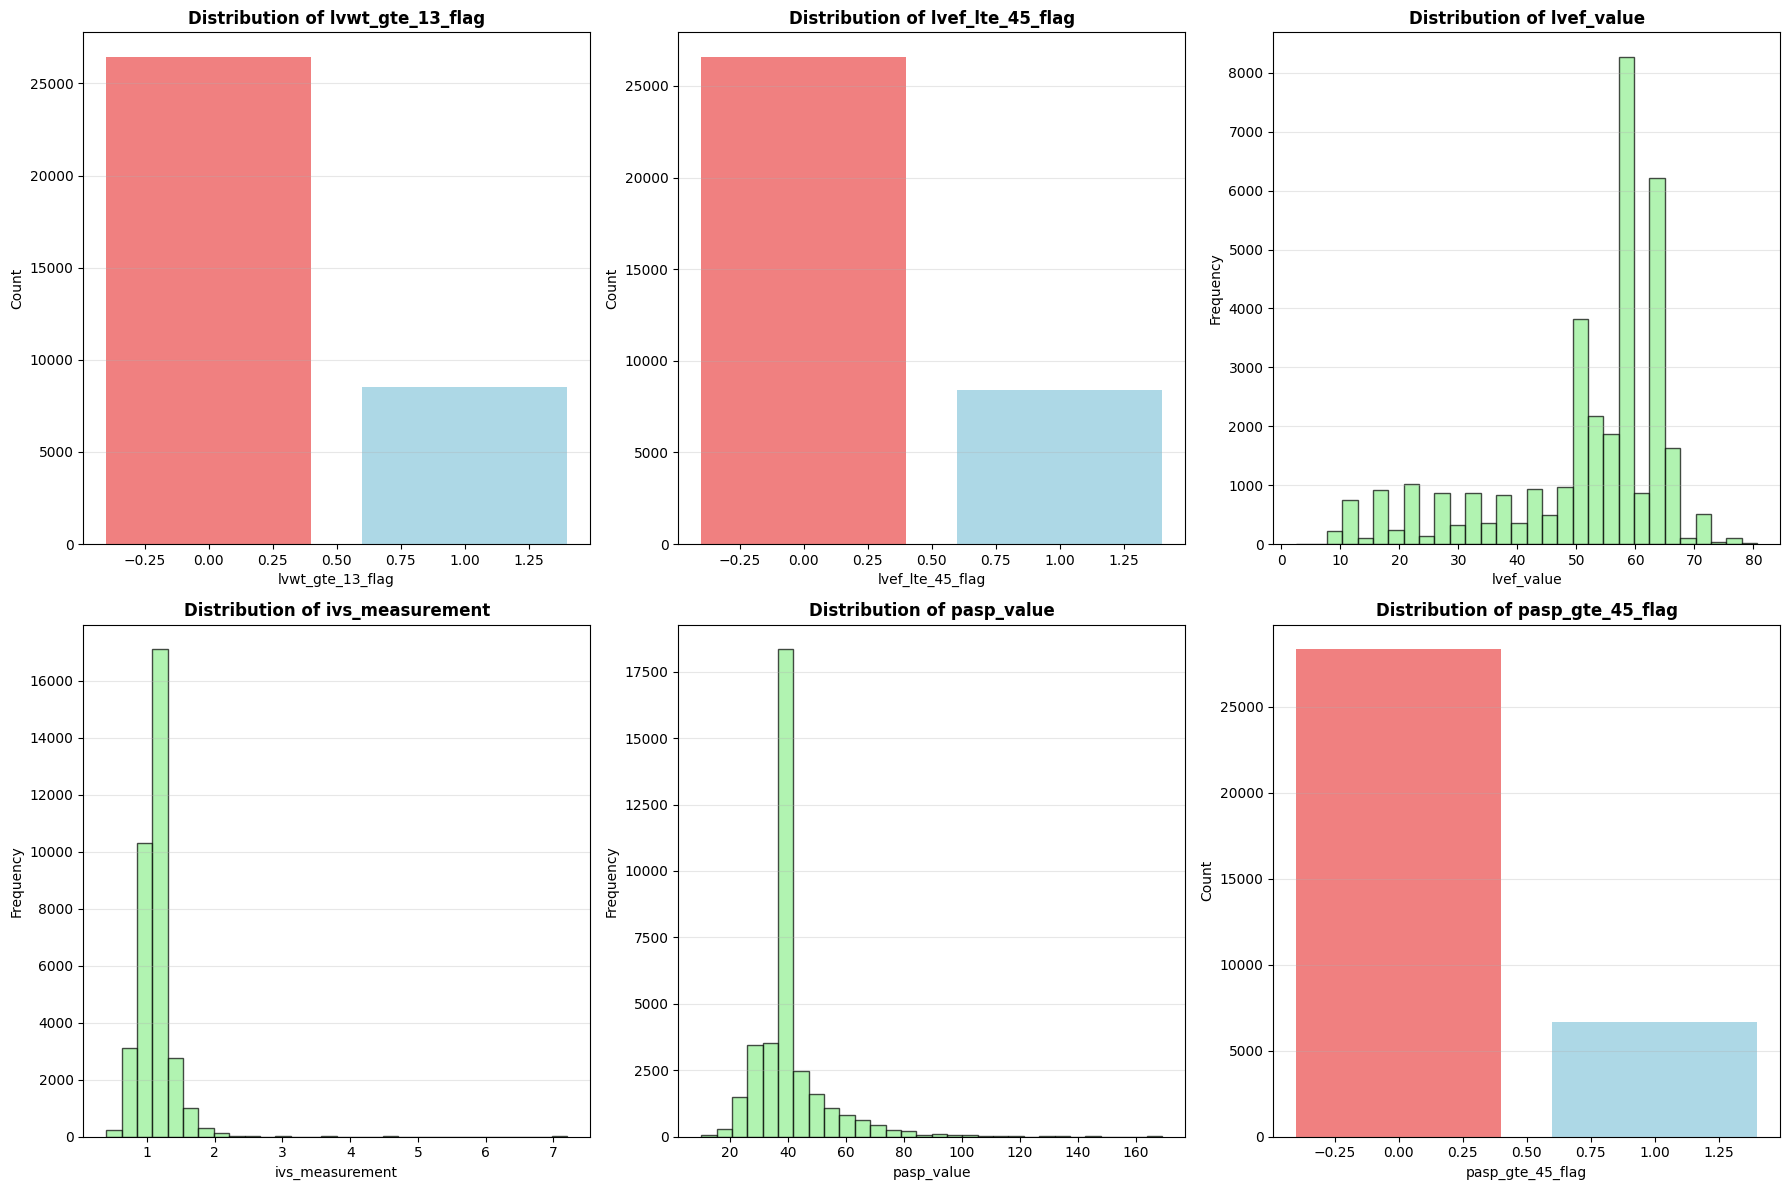

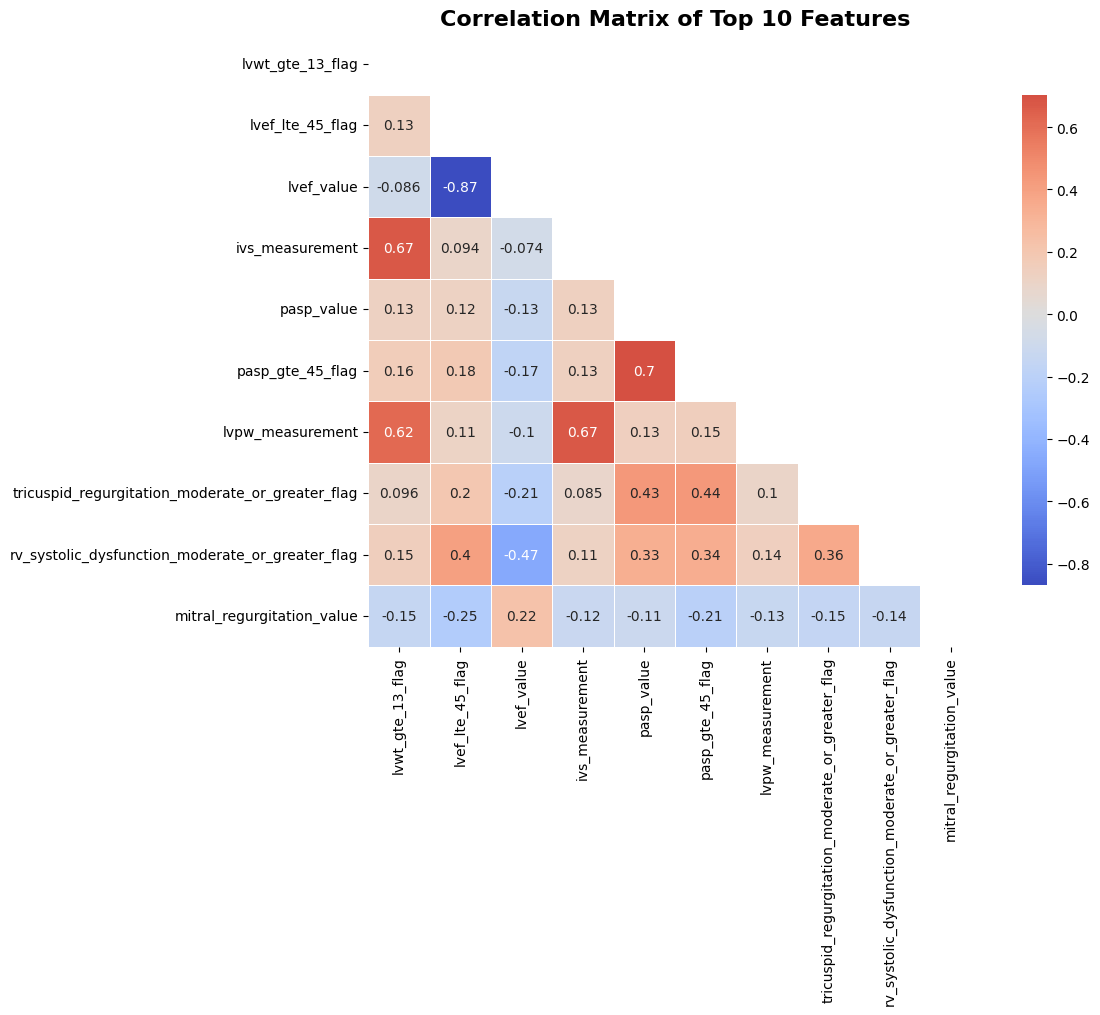

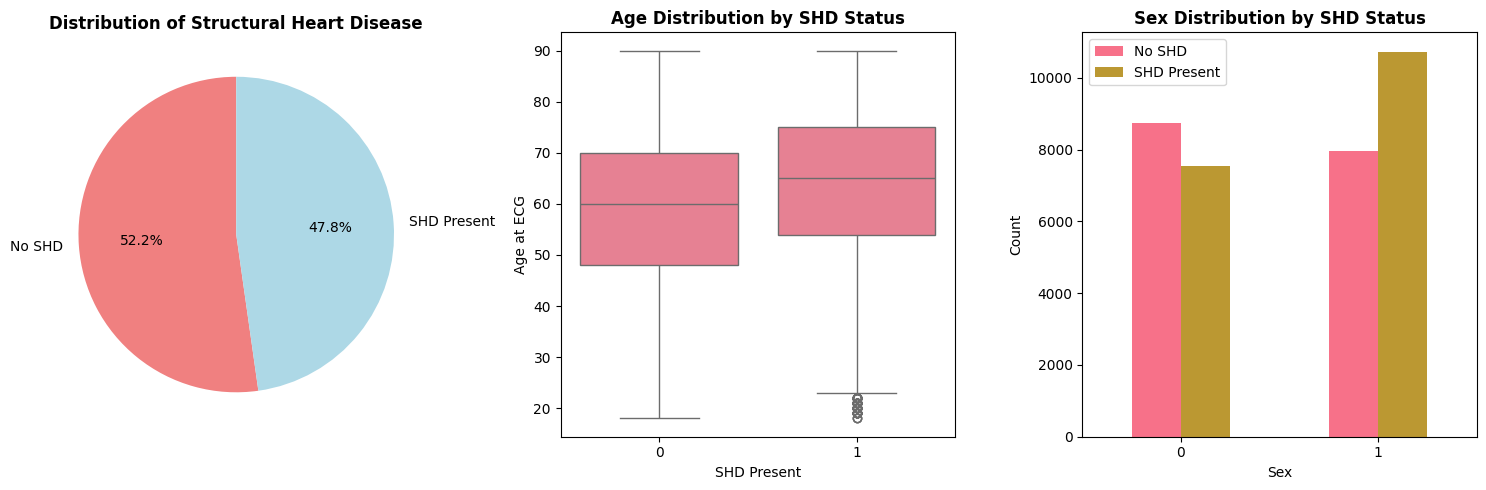


Target Variable Statistics:
Total samples: 35000
SHD Present: 18284 (52.2%)
No SHD: 16716 (47.8%)


In [38]:
# Comprehensive EDA for Top Features - Research Analysis
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

print("="*60)
print("EXPLORATORY DATA ANALYSIS FOR STRUCTURAL HEART DISEASE")
print("="*60)

# 1. Feature Importance Visualization
plt.figure(figsize=(12, 8))
top_features.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Important Features for SHD Prediction', fontsize=16, fontweight='bold')
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nTop 5 Most Important Features:")
for i, (feature, importance) in enumerate(top_features.head(5).items(), 1):
    print(f"{i}. {feature}: {importance:.4f}")

# 2. Distribution Analysis of Top Features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

top_6_features = top_features.head(6).index
for i, feature in enumerate(top_6_features):
    if i < 6:
        # Create distribution plots
        if feature in ['lvwt_gte_13_flag', 'lvef_lte_45_flag', 'pasp_gte_45_flag', 
                      'tricuspid_regurgitation_moderate_or_greater_flag', 
                      'rv_systolic_dysfunction_moderate_or_greater_flag']:
            # Binary features - bar plot
            value_counts = data[feature].value_counts()
            axes[i].bar(value_counts.index, value_counts.values, color=['lightcoral', 'lightblue'])
            axes[i].set_title(f'Distribution of {feature}', fontweight='bold')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Count')
            axes[i].grid(axis='y', alpha=0.3)
        else:
            # Continuous features - histogram
            axes[i].hist(data[feature].dropna(), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
            axes[i].set_title(f'Distribution of {feature}', fontweight='bold')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Correlation Analysis of Top Features
plt.figure(figsize=(12, 10))
correlation_matrix = data[top_features.index].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Top 10 Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Target Variable Analysis
plt.figure(figsize=(15, 5))

# Target distribution
plt.subplot(1, 3, 1)
target_counts = data['shd_moderate_or_greater_flag'].value_counts()
plt.pie(target_counts.values, labels=['No SHD', 'SHD Present'], autopct='%1.1f%%', 
        colors=['lightcoral', 'lightblue'], startangle=90)
plt.title('Distribution of Structural Heart Disease', fontweight='bold')

# Age distribution by target
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='shd_moderate_or_greater_flag', y='age_at_ecg')
plt.title('Age Distribution by SHD Status', fontweight='bold')
plt.xlabel('SHD Present')
plt.ylabel('Age at ECG')

# Sex distribution by target
plt.subplot(1, 3, 3)
sex_shd = pd.crosstab(data['sex'], data['shd_moderate_or_greater_flag'])
sex_shd.plot(kind='bar', ax=plt.gca())
plt.title('Sex Distribution by SHD Status', fontweight='bold')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No SHD', 'SHD Present'])

plt.tight_layout()
plt.show()

print(f"\nTarget Variable Statistics:")
print(f"Total samples: {len(data)}")
print(f"SHD Present: {data['shd_moderate_or_greater_flag'].sum()} ({data['shd_moderate_or_greater_flag'].mean()*100:.1f}%)")
print(f"No SHD: {(data['shd_moderate_or_greater_flag']==0).sum()} ({(1-data['shd_moderate_or_greater_flag'].mean())*100:.1f}%)")



CLINICAL ANALYSIS AND STATISTICAL TESTS


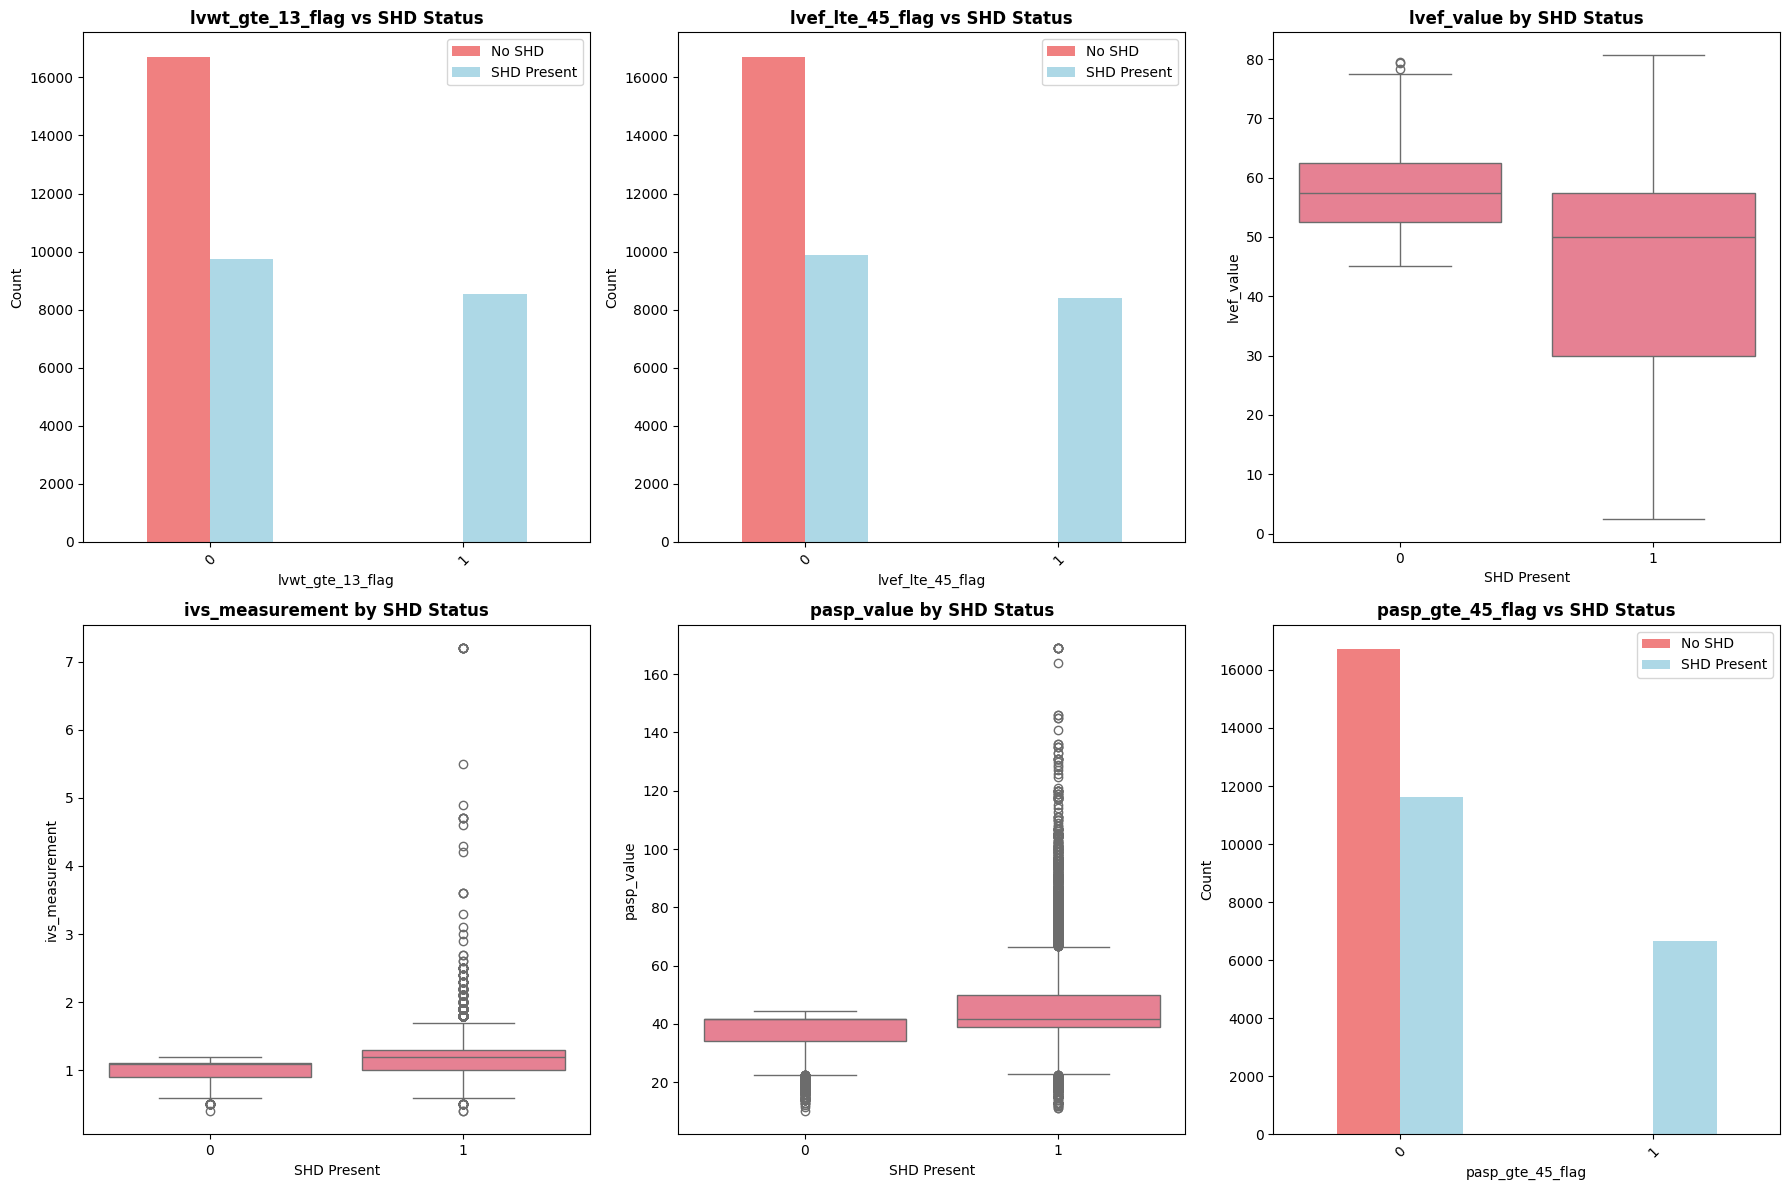


Statistical Significance Tests (Chi-square for binary, t-test for continuous):
----------------------------------------------------------------------
lvwt_gte_13_flag: Chi-square = 10336.2158, p-value = 0.000000
lvef_lte_45_flag: Chi-square = 10107.0097, p-value = 0.000000
lvef_value: t-statistic = -91.1246, p-value = 0.000000
ivs_measurement: t-statistic = 75.0651, p-value = 0.000000
pasp_value: t-statistic = 63.0501, p-value = 0.000000
pasp_gte_45_flag: Chi-square = 7499.2709, p-value = 0.000000
lvpw_measurement: t-statistic = 73.2752, p-value = 0.000000
tricuspid_regurgitation_moderate_or_greater_flag: Chi-square = 3778.1403, p-value = 0.000000
rv_systolic_dysfunction_moderate_or_greater_flag: Chi-square = 4911.3040, p-value = 0.000000
mitral_regurgitation_value: t-statistic = -62.5594, p-value = 0.000000

CLINICAL INTERPRETATION SUMMARY

Top Features Clinical Significance:
1. lvwt_gte_13_flag (Importance: 0.1378)
   Clinical: Left Ventricular Wall Thickness ≥13mm - Indicator of le

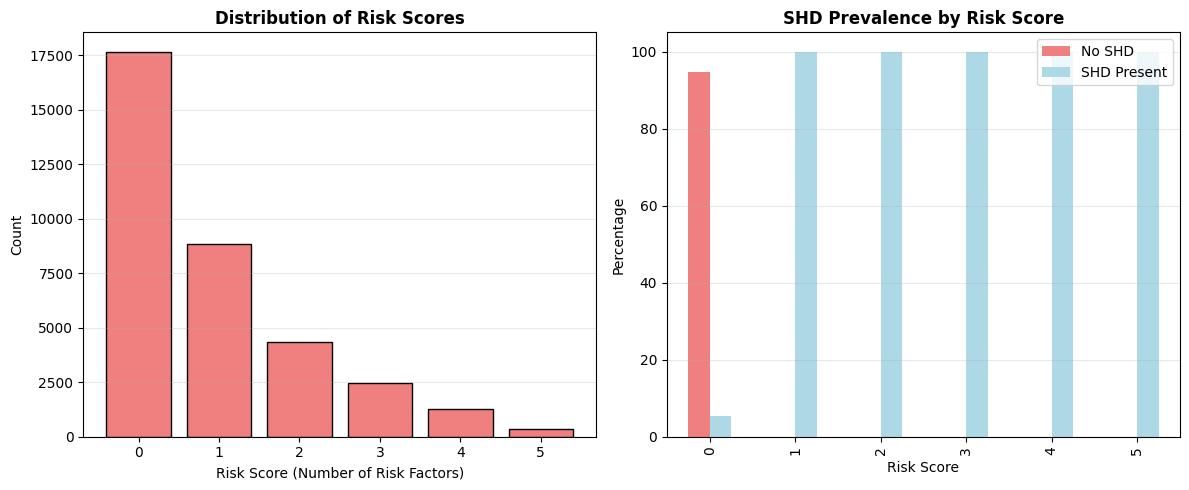


Risk Score Analysis:
Risk Score 0: 17666 patients, SHD rate: 5.4%
Risk Score 1: 8854 patients, SHD rate: 100.0%
Risk Score 2: 4358 patients, SHD rate: 100.0%
Risk Score 3: 2470 patients, SHD rate: 100.0%
Risk Score 4: 1286 patients, SHD rate: 100.0%
Risk Score 5: 366 patients, SHD rate: 100.0%


In [39]:
# Clinical Analysis and Statistical Tests for Top Features
print("\n" + "="*60)
print("CLINICAL ANALYSIS AND STATISTICAL TESTS")
print("="*60)

# 5. Feature-Target Relationship Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

top_6_features = top_features.head(6).index
for i, feature in enumerate(top_6_features):
    if i < 6:
        if feature in ['lvwt_gte_13_flag', 'lvef_lte_45_flag', 'pasp_gte_45_flag', 
                      'tricuspid_regurgitation_moderate_or_greater_flag', 
                      'rv_systolic_dysfunction_moderate_or_greater_flag']:
            # Binary features - grouped bar chart
            crosstab = pd.crosstab(data[feature], data['shd_moderate_or_greater_flag'])
            crosstab.plot(kind='bar', ax=axes[i], color=['lightcoral', 'lightblue'])
            axes[i].set_title(f'{feature} vs SHD Status', fontweight='bold')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Count')
            axes[i].legend(['No SHD', 'SHD Present'])
            axes[i].tick_params(axis='x', rotation=45)
        else:
            # Continuous features - box plot
            sns.boxplot(data=data, x='shd_moderate_or_greater_flag', y=feature, ax=axes[i])
            axes[i].set_title(f'{feature} by SHD Status', fontweight='bold')
            axes[i].set_xlabel('SHD Present')
            axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

# 6. Statistical Significance Tests
print("\nStatistical Significance Tests (Chi-square for binary, t-test for continuous):")
print("-" * 70)

for feature in top_features.index:
    if feature in ['lvwt_gte_13_flag', 'lvef_lte_45_flag', 'pasp_gte_45_flag', 
                  'tricuspid_regurgitation_moderate_or_greater_flag', 
                  'rv_systolic_dysfunction_moderate_or_greater_flag']:
        # Chi-square test for binary features
        contingency_table = pd.crosstab(data[feature], data['shd_moderate_or_greater_flag'])
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        print(f"{feature}: Chi-square = {chi2:.4f}, p-value = {p_value:.6f}")
    else:
        # t-test for continuous features
        group_0 = data[data['shd_moderate_or_greater_flag'] == 0][feature].dropna()
        group_1 = data[data['shd_moderate_or_greater_flag'] == 1][feature].dropna()
        t_stat, p_value = stats.ttest_ind(group_1, group_0)
        print(f"{feature}: t-statistic = {t_stat:.4f}, p-value = {p_value:.6f}")

# 7. Clinical Interpretation Summary
print("\n" + "="*60)
print("CLINICAL INTERPRETATION SUMMARY")
print("="*60)

clinical_interpretations = {
    'lvwt_gte_13_flag': 'Left Ventricular Wall Thickness ≥13mm - Indicator of left ventricular hypertrophy',
    'lvef_lte_45_flag': 'Left Ventricular Ejection Fraction ≤45% - Indicator of systolic dysfunction',
    'lvef_value': 'Left Ventricular Ejection Fraction - Direct measure of cardiac pumping efficiency',
    'ivs_measurement': 'Interventricular Septum Measurement - Wall thickness measurement',
    'pasp_value': 'Pulmonary Artery Systolic Pressure - Right heart pressure indicator',
    'pasp_gte_45_flag': 'Pulmonary Artery Systolic Pressure ≥45mmHg - Pulmonary hypertension indicator',
    'lvpw_measurement': 'Left Ventricular Posterior Wall Measurement - Wall thickness',
    'tricuspid_regurgitation_moderate_or_greater_flag': 'Tricuspid Regurgitation - Right heart valve dysfunction',
    'rv_systolic_dysfunction_moderate_or_greater_flag': 'Right Ventricular Systolic Dysfunction - Right heart pump failure',
    'rv_systolic_function_value': 'Right Ventricular Systolic Function - Right heart function measure'
}

print("\nTop Features Clinical Significance:")
for i, (feature, interpretation) in enumerate(clinical_interpretations.items(), 1):
    if feature in top_features.index:
        importance = top_features[feature]
        print(f"{i}. {feature} (Importance: {importance:.4f})")
        print(f"   Clinical: {interpretation}")
        print()

# 8. Risk Stratification Analysis
print("RISK STRATIFICATION ANALYSIS")
print("-" * 40)

# Calculate risk scores based on top features
risk_features = ['lvwt_gte_13_flag', 'lvef_lte_45_flag', 'pasp_gte_45_flag', 
                'tricuspid_regurgitation_moderate_or_greater_flag', 
                'rv_systolic_dysfunction_moderate_or_greater_flag']

data['risk_score'] = data[risk_features].sum(axis=1)

# Risk score distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
risk_counts = data['risk_score'].value_counts().sort_index()
plt.bar(risk_counts.index, risk_counts.values, color='lightcoral', edgecolor='black')
plt.title('Distribution of Risk Scores', fontweight='bold')
plt.xlabel('Risk Score (Number of Risk Factors)')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
risk_shd = pd.crosstab(data['risk_score'], data['shd_moderate_or_greater_flag'])
risk_shd_pct = risk_shd.div(risk_shd.sum(axis=1), axis=0) * 100
risk_shd_pct.plot(kind='bar', ax=plt.gca(), color=['lightcoral', 'lightblue'])
plt.title('SHD Prevalence by Risk Score', fontweight='bold')
plt.xlabel('Risk Score')
plt.ylabel('Percentage')
plt.legend(['No SHD', 'SHD Present'])
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nRisk Score Analysis:")
for score in sorted(data['risk_score'].unique()):
    count = (data['risk_score'] == score).sum()
    shd_count = data[data['risk_score'] == score]['shd_moderate_or_greater_flag'].sum()
    shd_rate = shd_count / count * 100 if count > 0 else 0
    print(f"Risk Score {score}: {count} patients, SHD rate: {shd_rate:.1f}%")


In [40]:
mean_age = data['age_at_ecg'].mean()
std_age = data['age_at_ecg'].std()
male_count = (data['sex'] == 1).sum()
female_count = (data['sex'] == 0).sum()
total_count = len(data)
male_pct = male_count / total_count * 100
female_pct = female_count / total_count * 100

print(f"The mean age was {mean_age:.1f} ({std_age:.1f}) years, with {male_pct:.1f}% male and {female_pct:.1f}% female participants.")

The mean age was 61.3 (16.0) years, with 53.4% male and 46.6% female participants.


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming grid_lr, grid_knn, and random_svm are already fitted best models
# Logistic Regression metrics
y_pred_lr = grid_lr.predict(X_top_test_scaled)
y_prob_lr = grid_lr.predict_proba(X_top_test_scaled)[:, 1]
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_prob_lr)

print(f"Logistic Regression ROC-AUC: {lr_roc_auc:.4f}")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-score: {lr_f1:.4f}")

# KNN metrics
y_pred_knn = grid_knn.predict(X_top_test_scaled)
y_prob_knn = grid_knn.predict_proba(X_top_test_scaled)[:, 1]
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_roc_auc = roc_auc_score(y_test, y_prob_knn)

print(f"KNN ROC-AUC: {knn_roc_auc:.4f}")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-score: {knn_f1:.4f}")

# SVM metrics
y_pred_svm = random_svm.predict(X_top_test_scaled)
y_prob_svm = random_svm.predict_proba(X_top_test_scaled)[:, 1]
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_roc_auc = roc_auc_score(y_test, y_prob_svm)

print(f"SVM ROC-AUC: {svm_roc_auc:.4f}")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-score: {svm_f1:.4f}")

Logistic Regression ROC-AUC: 0.9835
Accuracy: 0.9711
Precision: 1.0000
Recall: 0.9448
F1-score: 0.9716
KNN ROC-AUC: 0.9875
Accuracy: 0.9789
Precision: 0.9980
Recall: 0.9614
F1-score: 0.9794
SVM ROC-AUC: 0.9870
Accuracy: 0.9663
Precision: 0.9695
Recall: 0.9658
F1-score: 0.9677


In [43]:
from sklearn.metrics import roc_auc_score

# Example: Ablation study - Remove 'lvwt_gte_13_flag' and 'lvef_lte_45_flag' one at a time and evaluate ROC-AUC


ablation_results = {}

for feature_to_remove in ['lvwt_gte_13_flag', 'lvef_lte_45_flag']:
    ablation_features = [f for f in top_features.index if f != feature_to_remove]
    X_ablate_train = X_top_train[ablation_features]
    X_ablate_test = X_top_test[ablation_features]
    scaler_ablate = StandardScaler()
    X_ablate_train_scaled = scaler_ablate.fit_transform(X_ablate_train)
    X_ablate_test_scaled = scaler_ablate.transform(X_ablate_test)
    
    # Use Logistic Regression for demonstration
    model_ablate = LogisticRegression(max_iter=1000)
    model_ablate.fit(X_ablate_train_scaled, y_train)
    y_prob_ablate = model_ablate.predict_proba(X_ablate_test_scaled)[:, 1]
    roc_auc_ablate = roc_auc_score(y_test, y_prob_ablate)
    ablation_results[feature_to_remove] = roc_auc_ablate

print("Ablation Study Results (ROC-AUC after feature removal):")
for feature, auc_score in ablation_results.items():
    print(f"Removed {feature}: ROC-AUC = {auc_score:.4f}")

# To report the drop, compare with original ROC-AUC
roc_auc_original = lr_roc_auc
for feature, auc_score in ablation_results.items():
    drop = roc_auc_original - auc_score
    print(f"Removal of {feature} resulted in ROC-AUC decrease of {drop:.4f}")

Ablation Study Results (ROC-AUC after feature removal):
Removed lvwt_gte_13_flag: ROC-AUC = 0.9767
Removed lvef_lte_45_flag: ROC-AUC = 0.9709
Removal of lvwt_gte_13_flag resulted in ROC-AUC decrease of 0.0068
Removal of lvef_lte_45_flag resulted in ROC-AUC decrease of 0.0127
